In [1]:
# Import and concatenate
import pandas as pd
import ast

# Define a function to load, process, and add a city column to the dataset
def load_and_process_dataset(filepath, city_name):
    df = pd.read_excel(filepath)
    
    # Convert columns from string to dictionary
    df['new_car_detail'] = df['new_car_detail'].apply(ast.literal_eval)
    df['new_car_overview'] = df['new_car_overview'].apply(ast.literal_eval)
    df['new_car_feature'] = df['new_car_feature'].apply(ast.literal_eval)
    df['new_car_specs'] = df['new_car_specs'].apply(ast.literal_eval)
    
    # Add a column for the city
    df['City'] = city_name
    
    # Extract relevant fields from 'new_car_detail'
    df['Ignition_type'] = df['new_car_detail'].apply(lambda x: x.get('it'))
    df['Fuel_type'] = df['new_car_detail'].apply(lambda x: x.get('ft'))
    df['Body_type'] = df['new_car_detail'].apply(lambda x: x.get('bt'))
    df['Kilometers_driven'] = df['new_car_detail'].apply(lambda x: x.get('km'))
    df['Transmission_type'] = df['new_car_detail'].apply(lambda x: x.get('transmission'))
    df['No_of_previous_owners'] = df['new_car_detail'].apply(lambda x: x.get('ownerNo'))
    df['Ownership_details'] = df['new_car_detail'].apply(lambda x: x.get('owner'))
    df['Original_Equipment_Manufacturer'] = df['new_car_detail'].apply(lambda x: x.get('oem'))
    df['Car_model'] = df['new_car_detail'].apply(lambda x: x.get('model'))
    df['Year_of_car_manufacture'] = df['new_car_detail'].apply(lambda x: x.get('modelYear'))
    df['Central_variant_ID'] = df['new_car_detail'].apply(lambda x: x.get('centralVariantId'))
    df['Variant_name'] = df['new_car_detail'].apply(lambda x: x.get('variantName'))
    df['Price_of_the_used_car'] = df['new_car_detail'].apply(lambda x: x.get('price'))
    df['Actual_price'] = df['new_car_detail'].apply(lambda x: x.get('priceActual'))
    df['Price_saving_information'] = df['new_car_detail'].apply(lambda x: x.get('priceSaving'))
    df['Fixed_price_details'] = df['new_car_detail'].apply(lambda x: x.get('priceFixedText'))
    df['trending_imgUrl'] = df['new_car_detail'].apply(lambda x: x['trendingText']['imgUrl'] if 'trendingText' in x and x['trendingText'] else None)
    df['trending_heading'] = df['new_car_detail'].apply(lambda x: x['trendingText']['heading'] if 'trendingText' in x and x['trendingText'] else None)
    df['trending_desc'] = df['new_car_detail'].apply(lambda x: x['trendingText']['desc'] if 'trendingText' in x and x['trendingText'] else None)
    
    # Define a function to extract 'top' data (both 'value' and 'icon') from 'new_car_overview'
    def extract_top_data(row, key_name, field):
        top_data = row.get('top', [])
        for item in top_data:
            if item['key'] == key_name:
                return item.get(field)
        return None
    
    # Extract values and icons for specific keys in 'new_car_overview'
    df['Registration Year'] = df['new_car_overview'].apply(lambda x: extract_top_data(x, 'Registration Year', 'value'))
    df['Registration Year Icon'] = df['new_car_overview'].apply(lambda x: extract_top_data(x, 'Registration Year', 'icon'))
    df['Insurance Validity'] = df['new_car_overview'].apply(lambda x: extract_top_data(x, 'Insurance Validity', 'value'))
    df['Insurance Validity Icon'] = df['new_car_overview'].apply(lambda x: extract_top_data(x, 'Insurance Validity', 'icon'))
    df['Fuel Type'] = df['new_car_overview'].apply(lambda x: extract_top_data(x, 'Fuel Type', 'value'))
    df['Fuel Type Icon'] = df['new_car_overview'].apply(lambda x: extract_top_data(x, 'Fuel Type', 'icon'))
    df['Seats'] = df['new_car_overview'].apply(lambda x: extract_top_data(x, 'Seats', 'value'))
    df['Seats Icon'] = df['new_car_overview'].apply(lambda x: extract_top_data(x, 'Seats', 'icon'))
    df['Kms Driven'] = df['new_car_overview'].apply(lambda x: extract_top_data(x, 'Kms Driven', 'value'))
    df['Kms Driven Icon'] = df['new_car_overview'].apply(lambda x: extract_top_data(x, 'Kms Driven', 'icon'))
    df['RTO'] = df['new_car_overview'].apply(lambda x: extract_top_data(x, 'RTO', 'value'))
    df['RTO Icon'] = df['new_car_overview'].apply(lambda x: extract_top_data(x, 'RTO', 'icon'))
    df['Ownership'] = df['new_car_overview'].apply(lambda x: extract_top_data(x, 'Ownership', 'value'))
    df['Ownership Icon'] = df['new_car_overview'].apply(lambda x: extract_top_data(x, 'Ownership', 'icon'))
    df['Engine Displacement'] = df['new_car_overview'].apply(lambda x: extract_top_data(x, 'Engine Displacement', 'value'))
    df['Engine Displacement Icon'] = df['new_car_overview'].apply(lambda x: extract_top_data(x, 'Engine Displacement', 'icon'))
    df['Transmission'] = df['new_car_overview'].apply(lambda x: extract_top_data(x, 'Transmission', 'value'))
    df['Transmission Icon'] = df['new_car_overview'].apply(lambda x: extract_top_data(x, 'Transmission', 'icon'))
    df['Year of Manufacture'] = df['new_car_overview'].apply(lambda x: extract_top_data(x, 'Year of Manufacture', 'value'))
    df['Year of Manufacture Icon'] = df['new_car_overview'].apply(lambda x: extract_top_data(x, 'Year of Manufacture', 'icon'))
    
    # Define a function to extract 'top' features from 'new_car_feature'
    def extract_top_features(row):
        top_features = row.get('top', [])
        return [item['value'] for item in top_features]
    
    # Define a function to extract 'data' features from 'new_car_feature'
    def extract_data_features(row, heading_name):
        data_features = row.get('data', [])
        for item in data_features:
            if item['heading'] == heading_name:
                return [sub_item['value'] for sub_item in item.get('list', [])]
        return None
    
    # Extract 'top' features and 'data' features from 'new_car_feature'
    df['Top Features'] = df['new_car_feature'].apply(lambda x: extract_top_features(x))
    df['Top Features'] = df['Top Features'].apply(lambda x: ', '.join(x) if x else '')
    df['Comfort & Convenience'] = df['new_car_feature'].apply(lambda x: extract_data_features(x, 'Comfort & Convenience'))
    df['Comfort & Convenience'] = df['Comfort & Convenience'].apply(lambda x: ', '.join(x) if x else '')
    df['Interior'] = df['new_car_feature'].apply(lambda x: extract_data_features(x, 'Interior'))
    df['Interior'] = df['Interior'].apply(lambda x: ', '.join(x) if x else '')
    df['Exterior'] = df['new_car_feature'].apply(lambda x: extract_data_features(x, 'Exterior'))
    df['Exterior'] = df['Exterior'].apply(lambda x: ', '.join(x) if x else '')
    df['Safety'] = df['new_car_feature'].apply(lambda x: extract_data_features(x, 'Safety'))
    df['Safety'] = df['Safety'].apply(lambda x: ', '.join(x) if x else '')
    
    # Define a function to extract 'top' specs from 'new_car_specs'
    def extract_top_specs(row, key_name):
        top_data = row.get('top', [])
        for item in top_data:
            if item['key'] == key_name:
                return item['value']
        return None
    
    # Define a function to extract 'data' values from 'new_car_specs'
    def extract_data_specs(row, heading, subheading, key_name):
        data = row.get('data', [])
        for item in data:
            if item['heading'] == heading:
                for subitem in item.get('list', []):
                    if subitem['key'] == key_name:
                        return subitem['value']
        return None
    
    # Extract specific specs from 'new_car_specs'
    df['Mileage'] = df['new_car_specs'].apply(lambda x: extract_top_specs(x, 'Mileage'))
    df['Engine'] = df['new_car_specs'].apply(lambda x: extract_top_specs(x, 'Engine'))
    df['Max Power'] = df['new_car_specs'].apply(lambda x: extract_top_specs(x, 'Max Power'))
    df['Torque'] = df['new_car_specs'].apply(lambda x: extract_top_specs(x, 'Torque'))
    df['No_Seats'] = df['new_car_specs'].apply(lambda x: extract_top_specs(x, 'Seats'))
    # Extract engine and transmission specs from 'new_car_specs'
    df['Color'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Engine and Transmission', 'Engine', 'Color'))
    df['Engine Type'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Engine and Transmission', 'Engine', 'Engine Type'))
    df['Displacement'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Engine and Transmission', 'Engine', 'Displacement'))
    df['Max Power@rpm'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Engine and Transmission', 'Engine', 'Max Power'))
    df['Max Torque@rpm'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Engine and Transmission', 'Engine', 'Max Torque'))
    df['No of Cylinder'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Engine and Transmission', 'Engine', 'No of Cylinder'))
    df['Values per Cylinder'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Engine and Transmission', 'Engine', 'Values per Cylinder'))
    df['Value Configuration'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Engine and Transmission', 'Engine', 'Value Configuration'))
    df['Fuel Suppy System'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Engine and Transmission', 'Engine', 'Fuel Suppy System'))
    df['BoreX Stroke'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Engine and Transmission', 'Engine', 'BoreX Stroke'))
    df['Compression Ratio'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Engine and Transmission', 'Engine', 'Compression Ratio'))
    df['Turbo Charger'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Engine and Transmission', 'Engine', 'Turbo Charger'))
    df['Super Charger'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Engine and Transmission', 'Engine', 'Super Charger'))
    # Extract Dimensions & Capacity specs from 'new_car_specs'
    df['Length'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Dimensions & Capacity', 'Dimensions', 'Length'))
    df['Width'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Dimensions & Capacity', 'Dimensions', 'Width'))
    df['Height'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Dimensions & Capacity', 'Dimensions', 'Height'))
    df['Wheel Base'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Dimensions & Capacity', 'Dimensions', 'Wheel Base'))
    df['Front Tread'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Dimensions & Capacity', 'Dimensions', 'Front Tread'))
    df['Rear Tread'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Dimensions & Capacity', 'Dimensions', 'Rear Tread'))
    df['Kerb Weight'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Dimensions & Capacity', 'Dimensions', 'Kerb Weight'))
    df['Gross Weight'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Dimensions & Capacity', 'Dimensions', 'Gross Weight'))
    # Extract Miscellaneous specs from 'new_car_specs'
    df['Gear Box'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Miscellaneous', 'Miscellaneous', 'Gear Box'))
    df['Drive Type'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Miscellaneous', 'Miscellaneous', 'Drive Type'))
    df['Seating Capacity'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Miscellaneous', 'Miscellaneous', 'Seating Capacity'))
    df['Steering Type'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Miscellaneous', 'Miscellaneous', 'Steering Type'))
    df['Turning Radius'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Miscellaneous', 'Miscellaneous', 'Turning Radius'))
    df['Front Brake Type'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Miscellaneous', 'Miscellaneous', 'Front Brake Type'))
    df['Rear Brake Type'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Miscellaneous', 'Miscellaneous', 'Rear Brake Type'))
    df['Top Speed'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Miscellaneous', 'Miscellaneous', 'Top Speed'))
    df['Acceleration'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Miscellaneous', 'Miscellaneous', 'Acceleration'))
    df['Tyre Type'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Miscellaneous', 'Miscellaneous', 'Tyre Type'))
    df['No Door Numbers'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Miscellaneous', 'Miscellaneous', 'No Door Numbers'))
    df['Cargo Volumn'] = df['new_car_specs'].apply(lambda x: extract_data_specs(x, 'Miscellaneous', 'Miscellaneous', 'Cargo Volumn'))
    
    return df

# Filepaths for the six cities (replace with actual file paths)
filepaths = {
    'Bangalore': "C:\\Users\\Shiyas Backer\\Desktop\\project3\\datasets\\bangalore_cars.xlsx",
    'Chennai': "C:\\Users\\Shiyas Backer\\Desktop\\project3\\datasets\\chennai_cars.xlsx",
    'Delhi': "C:\\Users\\Shiyas Backer\\Desktop\\project3\\datasets\\delhi_cars.xlsx",
    'Hyderabad': "C:\\Users\\Shiyas Backer\\Desktop\\project3\\datasets\\hyderabad_cars.xlsx",
    'Jaipur': "C:\\Users\\Shiyas Backer\\Desktop\\project3\\datasets\\jaipur_cars.xlsx",   
    'Kolkata': "C:\\Users\\Shiyas Backer\\Desktop\\project3\\datasets\\kolkata_cars.xlsx"
    
}

# Load, process, and concatenate datasets for all cities
all_cities_df = pd.concat([load_and_process_dataset(filepath, city) for city, filepath in filepaths.items()])
all_cities_df

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,City,Ignition_type,Fuel_type,Body_type,Kilometers_driven,...,Seating Capacity,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,No Door Numbers,Cargo Volumn
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Bangalore,0,Petrol,Hatchback,"1,20,000",...,5,Power,4.7 metres,Ventilated Disc,Drum,150 Kmph,15.05 Seconds,"Tubeless, Radial",5,235-litres
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Bangalore,0,Petrol,SUV,"32,706",...,5,Power,5.3 metres,Ventilated Disc,Drum,None,None,"Tubeless,Radial",4,352-litres
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Bangalore,0,Petrol,Hatchback,"11,949",...,5,Power,4.9 meters,Disc,Drum,150 kmph,14.3 Seconds,Tubeless,5,242-litres
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Bangalore,0,Petrol,Sedan,"17,794",...,5,Power,4.7 metres,Disc,Drum,172km/hr,14.2 Seconds,"Tubeless,Radial",4,407-litres
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Bangalore,0,Diesel,SUV,"60,000",...,5,Power,5.2 meters,Ventilated Disc,Solid Disc,190 Kmph,12 Seconds,"Tubeless,Radial",5,353-litres
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Kolkata,0,Petrol,Hatchback,"10,000",...,5,Electric,None,Ventilated Disc,Drum,None,None,"Tubeless, Radial",5,313
1377,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Kolkata,0,Petrol,Hatchback,"1,20,000",...,5,Power,4.6 metres,Solid Disc,Drum,140 kmph,19 Seconds,Tubeless Tyres,5,177-litres
1378,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Kolkata,0,Petrol,Sedan,"50,000",...,5,Power,5.42 metres,Ventilated Disc,Solid Disc,230km/hr,8.8 Seconds,"Tubeless,Radial",4,475-litres
1379,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Kolkata,0,Petrol,Hatchback,"40,000",...,5,Power,4.7 metres,Ventilated Disc,Drum,156 Kmph,15 Seconds,"Tubeless,Radial",5,236-liters


In [2]:
all_cities_df.drop(columns=['new_car_detail',
                            'new_car_overview',
                            'new_car_feature','new_car_specs',
                            'car_links','Engine','Ignition_type',
                            'No_Seats','Fixed_price_details','Ownership_details',
                            'Price_saving_information','Displacement',
                            'Seating Capacity','Kms Driven'], axis=1,inplace=True)

In [3]:
all_cities_df.columns

Index(['City', 'Fuel_type', 'Body_type', 'Kilometers_driven',
       'Transmission_type', 'No_of_previous_owners',
       'Original_Equipment_Manufacturer', 'Car_model',
       'Year_of_car_manufacture', 'Central_variant_ID', 'Variant_name',
       'Price_of_the_used_car', 'Actual_price', 'trending_imgUrl',
       'trending_heading', 'trending_desc', 'Registration Year',
       'Registration Year Icon', 'Insurance Validity',
       'Insurance Validity Icon', 'Fuel Type', 'Fuel Type Icon', 'Seats',
       'Seats Icon', 'Kms Driven Icon', 'RTO', 'RTO Icon', 'Ownership',
       'Ownership Icon', 'Engine Displacement', 'Engine Displacement Icon',
       'Transmission', 'Transmission Icon', 'Year of Manufacture',
       'Year of Manufacture Icon', 'Top Features', 'Comfort & Convenience',
       'Interior', 'Exterior', 'Safety', 'Mileage', 'Max Power', 'Torque',
       'Color', 'Engine Type', 'Max Power@rpm', 'Max Torque@rpm',
       'No of Cylinder', 'Values per Cylinder', 'Value Configurat

In [4]:
all_cities_df.drop(columns=[
        'Central_variant_ID',
        'Actual_price', 'trending_imgUrl',
       'trending_heading', 'trending_desc', 'Registration Year',
       'Registration Year Icon', 'Insurance Validity',
       'Insurance Validity Icon', 'Fuel Type', 'Fuel Type Icon',
       'Seats Icon', 'Kms Driven Icon', 'RTO', 'RTO Icon', 'Ownership',
       'Ownership Icon',  'Engine Displacement Icon',
       'Transmission', 'Transmission Icon', 'Year of Manufacture',
       'Year of Manufacture Icon', 'Top Features', 'Comfort & Convenience',
       'Interior', 'Exterior', 'Safety',
        'Engine Type', 'Max Power@rpm', 'Max Torque@rpm',
       'No of Cylinder', 'Values per Cylinder', 'Value Configuration',
       'Fuel Suppy System', 'BoreX Stroke', 'Compression Ratio',
       'Turbo Charger', 'Super Charger', 'Length', 'Width', 'Height',
       'Wheel Base', 'Front Tread', 'Rear Tread', 'Kerb Weight',
       'Gross Weight', 'Gear Box', 'Steering Type',
       'Turning Radius', 'Front Brake Type', 'Rear Brake Type', 'Top Speed',
       'Acceleration', 'Tyre Type', 'No Door Numbers', 'Cargo Volumn'], axis=1,inplace=True)

In [5]:
all_cities_df.columns

Index(['City', 'Fuel_type', 'Body_type', 'Kilometers_driven',
       'Transmission_type', 'No_of_previous_owners',
       'Original_Equipment_Manufacturer', 'Car_model',
       'Year_of_car_manufacture', 'Variant_name', 'Price_of_the_used_car',
       'Seats', 'Engine Displacement', 'Mileage', 'Max Power', 'Torque',
       'Color', 'Drive Type'],
      dtype='object')

In [6]:
numerical_columns = all_cities_df.select_dtypes(include=['number']).columns
numerical_columns

Index(['No_of_previous_owners', 'Year_of_car_manufacture'], dtype='object')

In [7]:
categorical_columns = all_cities_df.select_dtypes(include=['object']).columns
categorical_columns

Index(['City', 'Fuel_type', 'Body_type', 'Kilometers_driven',
       'Transmission_type', 'Original_Equipment_Manufacturer', 'Car_model',
       'Variant_name', 'Price_of_the_used_car', 'Seats', 'Engine Displacement',
       'Mileage', 'Max Power', 'Torque', 'Color', 'Drive Type'],
      dtype='object')

In [8]:
for column in all_cities_df.columns:
    print(f"Column: {column}")
    print(all_cities_df[column].value_counts())
    print("\n")

Column: City
City
Delhi        1485
Hyderabad    1483
Bangalore    1481
Chennai      1419
Kolkata      1381
Jaipur       1120
Name: count, dtype: int64


Column: Fuel_type
Fuel_type
Petrol      5554
Diesel      2673
Cng           98
Electric      28
Lpg           16
Name: count, dtype: int64


Column: Body_type
Body_type
Hatchback        3567
SUV              2225
Sedan            2174
MUV               352
Minivans           23
Coupe              10
Pickup Trucks       6
Convertibles        6
                    4
Hybrids             1
Wagon               1
Name: count, dtype: int64


Column: Kilometers_driven
Kilometers_driven
1,20,000    315
50,000      263
70,000      262
60,000      259
30,000      253
           ... 
52,802        1
46,830        1
70,038        1
15,957        1
1,51,000      1
Name: count, Length: 4090, dtype: int64


Column: Transmission_type
Transmission_type
Manual       6052
Automatic    2317
Name: count, dtype: int64


Column: No_of_previous_owners
No_of_p

In [9]:
all_cities_df[numerical_columns] = all_cities_df[numerical_columns].fillna(all_cities_df[numerical_columns].mean())
all_cities_df[categorical_columns] = all_cities_df[categorical_columns].fillna(all_cities_df[categorical_columns].mode().iloc[0])

In [10]:
import re

def convert_price(price_str):
    # Remove the currency symbol ₹ and commas
    price_str = price_str.replace('₹', '').replace(',', '').strip()
    
    #convert different units to numeric values
    if 'Lakh' in price_str:
        return int(float(re.sub(r'[^\d.]', '', price_str)) * 1_00_000) 
    elif 'Crore' in price_str:
        return int(float(re.sub(r'[^\d.]', '', price_str)) * 1_00_00_000) 
    else:
        return int(price_str) 

all_cities_df['Price_of_the_used_car'] = all_cities_df['Price_of_the_used_car'].apply(convert_price)

all_cities_df['Kilometers_driven'] = (all_cities_df['Kilometers_driven']
    .str.replace(',', '')  # Remove commas
    .str.extract('(\d+)')  # Extract only numeric values
    .astype(int)  # Finally, convert to int
)


<>:19: SyntaxWarning: invalid escape sequence '\d'
<>:19: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Shiyas Backer\AppData\Local\Temp\ipykernel_14680\3825725741.py:19: SyntaxWarning: invalid escape sequence '\d'
  .str.extract('(\d+)')  # Extract only numeric values


In [11]:
numerical_columns = all_cities_df.select_dtypes(include=['number']).columns
numerical_columns

Index(['Kilometers_driven', 'No_of_previous_owners', 'Year_of_car_manufacture',
       'Price_of_the_used_car'],
      dtype='object')

In [12]:
categorical_columns = all_cities_df.select_dtypes(include=['object']).columns
categorical_columns

Index(['City', 'Fuel_type', 'Body_type', 'Transmission_type',
       'Original_Equipment_Manufacturer', 'Car_model', 'Variant_name', 'Seats',
       'Engine Displacement', 'Mileage', 'Max Power', 'Torque', 'Color',
       'Drive Type'],
      dtype='object')

In [13]:
threshold = 5  # adjust this threshold based on data
top_5_manufacturers = all_cities_df['Original_Equipment_Manufacturer'].value_counts().nlargest(5).index

all_cities_df['Original_Equipment_Manufacturer'] = all_cities_df['Original_Equipment_Manufacturer'].apply(
    lambda x: x if x in top_5_manufacturers else 'Others'
)


In [14]:
all_cities_df['Fuel_type'] = all_cities_df['Fuel_type'].replace({'Cng': 'Other', 'Electric': 'Other', 'Lpg': 'Other'})

In [15]:

threshold = 3  # adjust this threshold based on data
top_3_body_types = all_cities_df['Body_type'].value_counts().nlargest(3).index

all_cities_df['Body_type'] = all_cities_df['Body_type'].apply(
    lambda x: x if x in top_3_body_types else 'Others'
)

In [16]:
threshold = 5  # adjust this threshold based on data
top_5_car_models = all_cities_df['Car_model'].value_counts().nlargest(5).index

all_cities_df['Car_model'] = all_cities_df['Car_model'].apply(
    lambda x: x if x in top_5_car_models else 'Others'
)


In [17]:
threshold = 5  # adjust this threshold based on data
top_5_variants = all_cities_df['Variant_name'].value_counts().nlargest(5).index

all_cities_df['Variant_name'] = all_cities_df['Variant_name'].apply(
    lambda x: x if x in top_5_variants else 'Others'
)

In [18]:
all_cities_df['Seats'] = all_cities_df['Seats'].replace({'9 Seats': 'Other', '2 Seats': 'Other', '10 Seats': 'Other'})

In [19]:
threshold = 5  # adjust this threshold based on data
top_5_engine_displacemets = all_cities_df['Engine Displacement'].value_counts().nlargest(5).index

all_cities_df['Engine Displacement'] = all_cities_df['Engine Displacement'].apply(
    lambda x: x if x in top_5_engine_displacemets else 'Others'
)

In [20]:
threshold = 5  # adjust this threshold based on data
top_5_Mileage = all_cities_df['Mileage'].value_counts().nlargest(5).index

all_cities_df['Mileage'] = all_cities_df['Mileage'].apply(
    lambda x: x if x in top_5_Mileage else 'Others'
)

In [21]:
threshold = 5  # adjust this threshold based on data
top_5_Max_Power = all_cities_df['Max Power'].value_counts().nlargest(5).index

all_cities_df['Max Power'] = all_cities_df['Max Power'].apply(
    lambda x: x if x in top_5_Max_Power else 'Others'
)

In [22]:
threshold = 5  # adjust this threshold based on data
top_5_Torque = all_cities_df['Torque'].value_counts().nlargest(5).index

all_cities_df['Torque'] = all_cities_df['Torque'].apply(
    lambda x: x if x in top_5_Torque else 'Others'
)

In [23]:
threshold = 5  # adjust this threshold based on data
top_5_Color = all_cities_df['Color'].value_counts().nlargest(5).index

all_cities_df['Color'] = all_cities_df['Color'].apply(
    lambda x: x if x in top_5_Color else 'Others'
)

In [24]:
threshold = 5  # adjust this threshold based on data
top_5_Drive_Type = all_cities_df['Drive Type'].value_counts().nlargest(5).index

all_cities_df['Drive Type'] = all_cities_df['Drive Type'].apply(
    lambda x: x if x in top_5_Drive_Type else 'Others'
)

In [25]:
for col in numerical_columns:
    non_numeric_data = all_cities_df[col][pd.to_numeric(all_cities_df[col], errors='coerce').isna()]
    if not non_numeric_data.empty:
        print(f"Non-numeric data found in column {col}:")
        print(non_numeric_data)

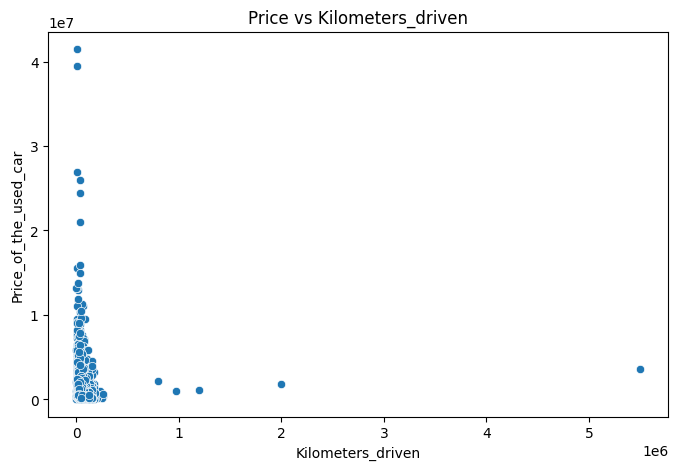

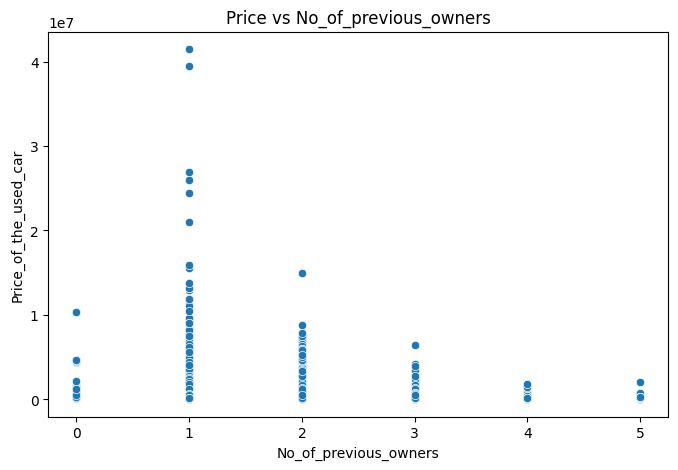

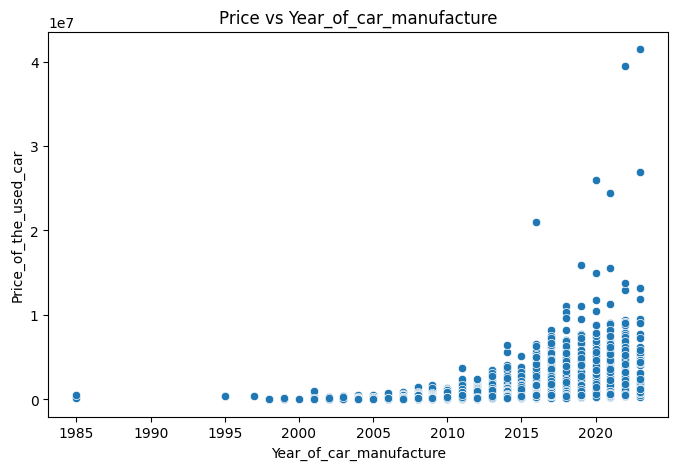

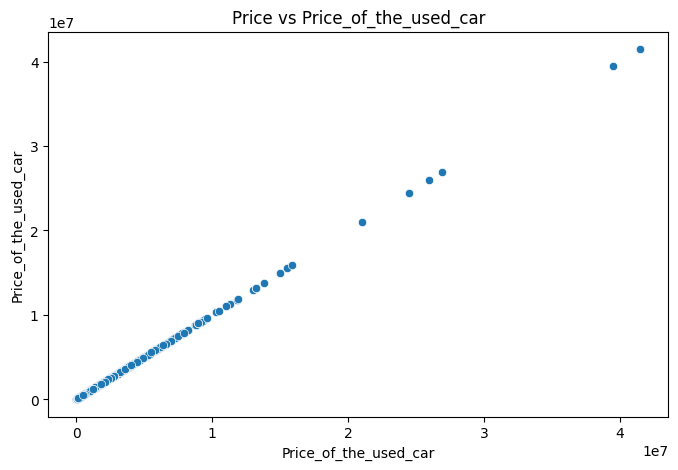

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for car price vs other numerical features
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=all_cities_df[col], y=all_cities_df['Price_of_the_used_car'])
    plt.title(f'Price vs {col}')
    plt.xlabel(col)
    plt.ylabel('Price_of_the_used_car')
    plt.show()

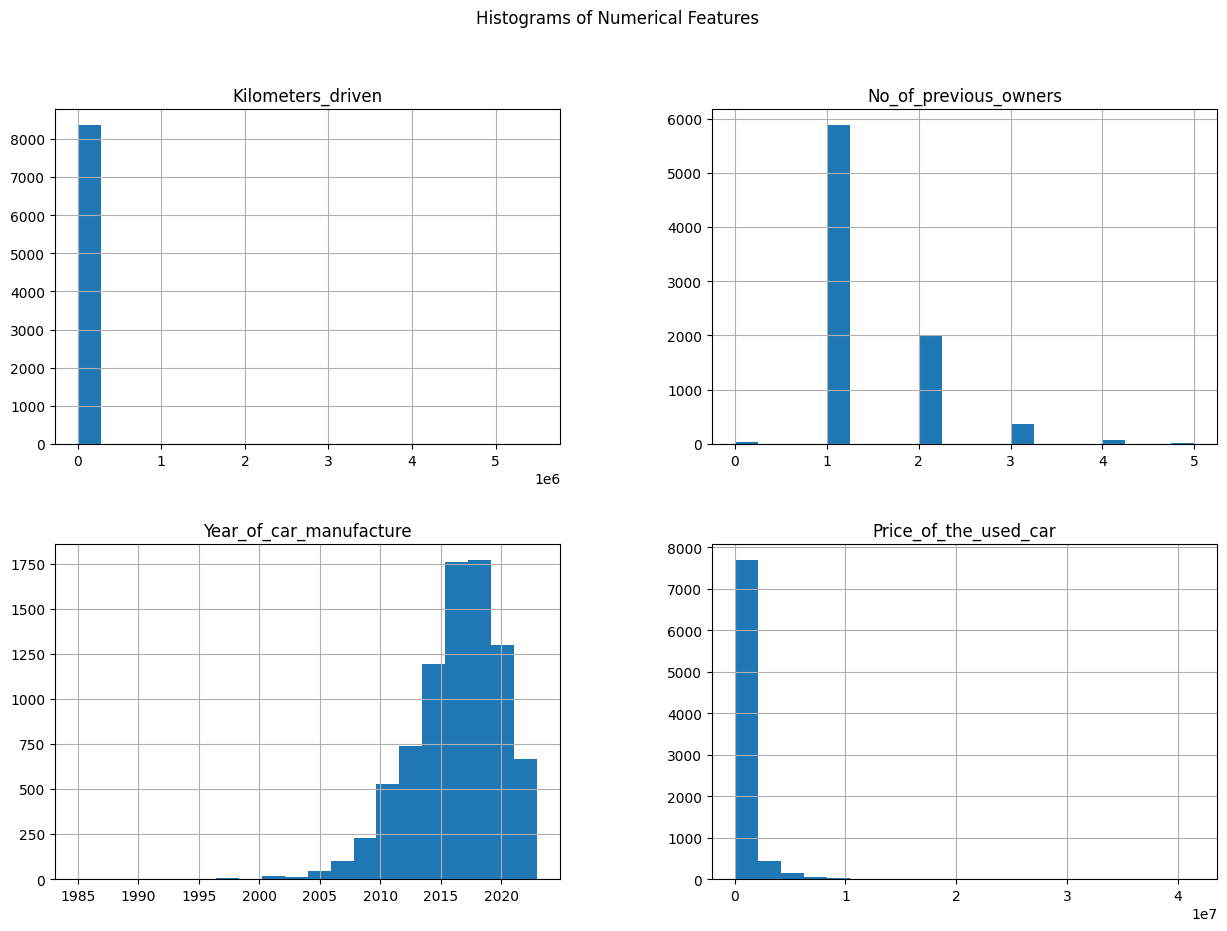

In [27]:
# Histograms
all_cities_df[numerical_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

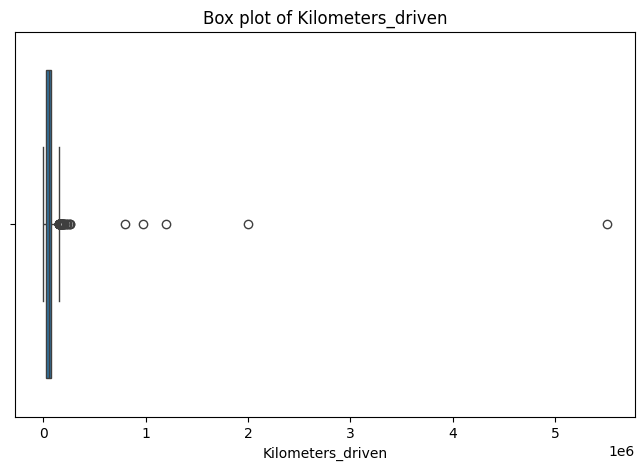

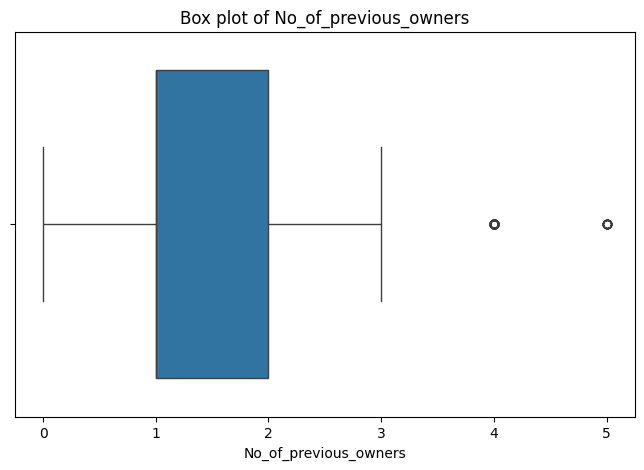

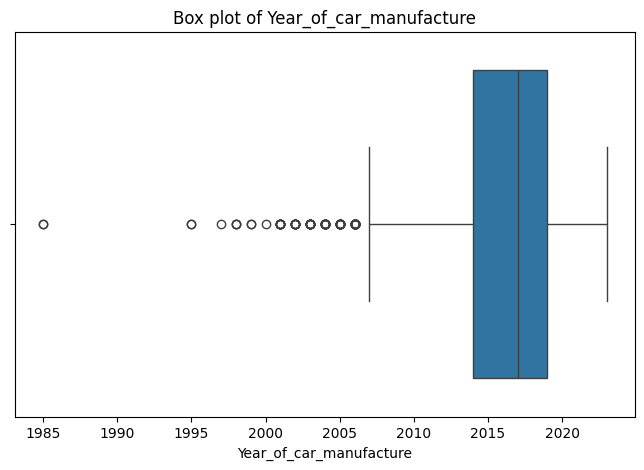

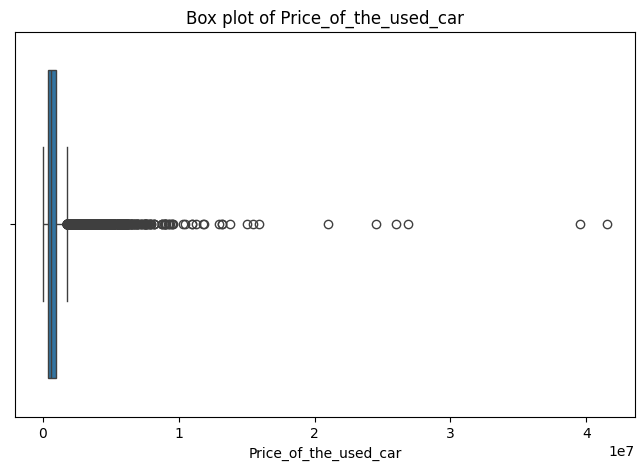

In [28]:
# Box plots for numerical features
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=all_cities_df[col])
    plt.title(f'Box plot of {col}')
    plt.show()

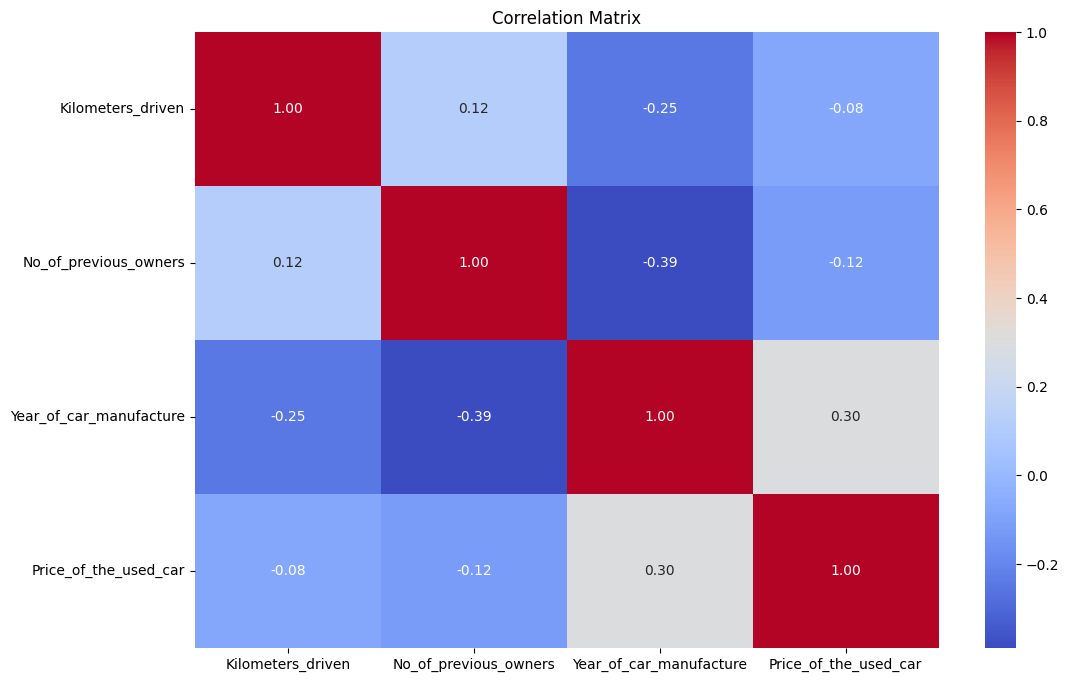

In [29]:
# Correlation matrix
numeric_df = all_cities_df.select_dtypes(include=[float, int])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [30]:
numerical_cols = all_cities_df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    Q1 = all_cities_df[col].quantile(0.05)
    Q3 = all_cities_df[col].quantile(0.95)
    IQR = Q3 - Q1
    all_cities_df = all_cities_df[~((all_cities_df[col] < (Q1 - 1.5 * IQR)) | (all_cities_df[col] > (Q3 + 1.5 * IQR)))]


In [31]:
all_cities_df.shape

(8307, 18)

In [32]:
# Feature selection
# Correlation Analysis
# Correlation with target variable
corr_with_target = corr_matrix['Price_of_the_used_car'].sort_values(ascending=False)
print(corr_with_target)

Price_of_the_used_car      1.000000
Year_of_car_manufacture    0.299459
Kilometers_driven         -0.077351
No_of_previous_owners     -0.120489
Name: Price_of_the_used_car, dtype: float64


In [33]:




from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import joblib
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
X = all_cities_df.drop(columns=['Price_of_the_used_car'])  # Features
y = all_cities_df['Price_of_the_used_car']  # Target variable
numerical_cols = ['Kilometers_driven', 'No_of_previous_owners', 'Year_of_car_manufacture']

categorical_cols = ['City', 'Fuel_type', 'Body_type', 'Transmission_type',
       'Original_Equipment_Manufacturer', 'Car_model', 'Variant_name', 'Seats',
       'Engine Displacement', 'Mileage', 'Max Power', 'Torque', 'Color',
       'Drive Type']
# Apply MinMaxScaler to numerical columns
scaler = MinMaxScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Save the MinMaxScaler
scaler_filename = "scaler.joblib_final1"
joblib.dump(scaler, scaler_filename)

# Apply LabelEncoder to categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le  # Store the encoder if needed later

# Save each LabelEncoder
label_encoders_filename = "label_encoders.joblib_final1"
joblib.dump(label_encoders, label_encoders_filename)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define different models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'KNN': KNeighborsRegressor()
}

# Train and evaluate each model using cross-validation
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on the test set

    # Evaluate the model
    print(f"Model: {name}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
    print(f"R^2 Score: {r2_score(y_test, y_pred)}")
    print("-" * 30)

Model: Linear Regression
Mean Absolute Error: 421908.5977845834
Mean Squared Error: 494422754888.1587
R^2 Score: 0.4778686127074664
------------------------------
Model: Decision Tree
Mean Absolute Error: 240024.5415162455
Mean Squared Error: 331585191715.72235
R^2 Score: 0.6498319819536742
------------------------------
Model: Random Forest
Mean Absolute Error: 189416.7620080368
Mean Squared Error: 193464998831.2616
R^2 Score: 0.7956927604289471
------------------------------
Model: Gradient Boosting
Mean Absolute Error: 235195.40633788757
Mean Squared Error: 224979551526.3583
R^2 Score: 0.7624120569097155
------------------------------
Model: KNN
Mean Absolute Error: 271448.1678700361
Mean Squared Error: 339013727724.2668
R^2 Score: 0.6419871330397702
------------------------------


Transmission_type                  0.266397
Year_of_car_manufacture            0.166476
Drive Type                         0.159133
Original_Equipment_Manufacturer    0.148279
Kilometers_driven                  0.077051
Body_type                          0.056793
Seats                              0.030870
City                               0.026361
Fuel_type                          0.020389
Color                              0.017308
Engine Displacement                0.012771
Mileage                            0.007541
No_of_previous_owners              0.007429
Car_model                          0.001629
Torque                             0.000987
Max Power                          0.000396
Variant_name                       0.000189
dtype: float64


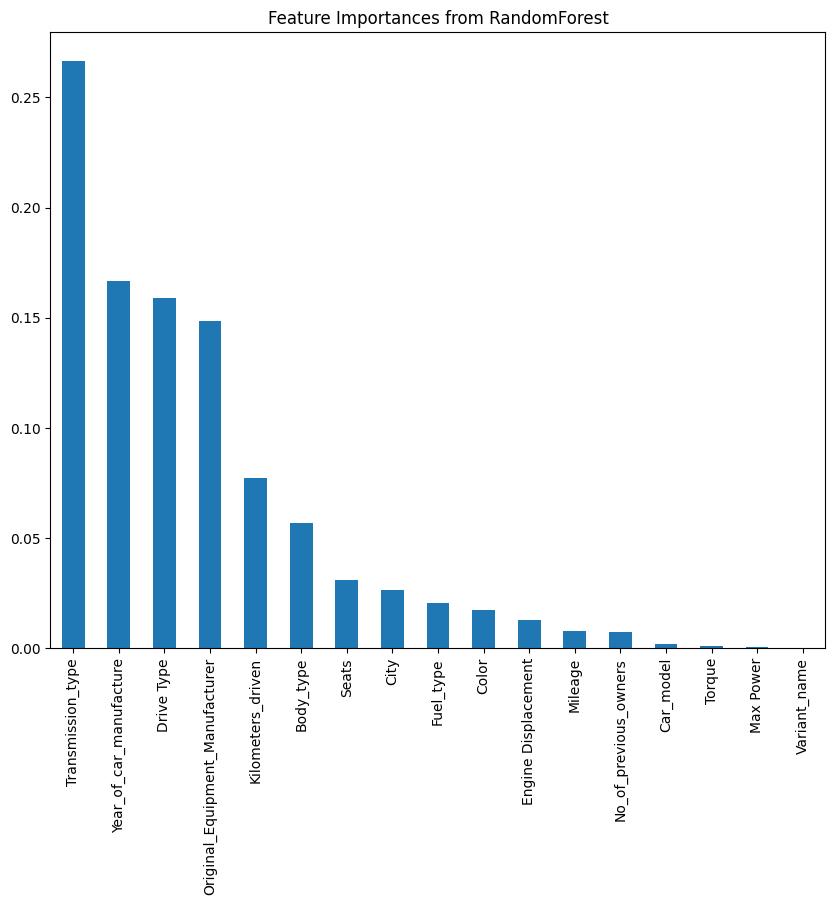

In [34]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Fit a RandomForest model
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 8))
feature_importances.plot(kind='bar')
plt.title('Feature Importances from RandomForest')
plt.show()

In [36]:
# model training
#cross-validation techniques
from sklearn.model_selection import cross_val_score

# Define the models as before
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'KNN': KNeighborsRegressor()
}

# Dictionary to store cross-validation results
cv_results = {}

# Perform cross-validation for each model
for name, model in models.items():
    # Cross-validation: using 5 folds
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    
    # Store the mean and standard deviation of the scores
    cv_results[name] = {
        'Mean CV MSE': -scores.mean(),
        'Std CV MSE': scores.std()
    }
    
    print(f"Model: {name}")
    print(f"Mean CV MSE: {-scores.mean()}")
    print(f"Std CV MSE: {scores.std()}")
    print("-" * 30)

Model: Linear Regression
Mean CV MSE: 470150694202.26105
Std CV MSE: 59339027790.53802
------------------------------
Model: Decision Tree
Mean CV MSE: 268242210301.41904
Std CV MSE: 43156351509.221664
------------------------------
Model: Random Forest
Mean CV MSE: 154873296422.32764
Std CV MSE: 19273393181.752995
------------------------------
Model: Gradient Boosting
Mean CV MSE: 185064398046.01877
Std CV MSE: 28982102180.2677
------------------------------
Model: KNN
Mean CV MSE: 318662661260.2615
Std CV MSE: 20681562272.709866
------------------------------


In [37]:
#Training the best model ( Random Forest) on the entire training set
best_model = models['Random Forest']
best_model.fit(X_train, y_train)

# Evaluate on the test set
y_pred_final = best_model.predict(X_test)

# Final evaluation metrics
print(f"Final Mean Absolute Error: {mean_absolute_error(y_test, y_pred_final)}")
print(f"Final Mean Squared Error: {mean_squared_error(y_test, y_pred_final)}")
print(f"Final R^2 Score: {r2_score(y_test, y_pred_final)}")

Final Mean Absolute Error: 189416.7620080368
Final Mean Squared Error: 193464998831.2616
Final R^2 Score: 0.7956927604289471


In [38]:
#grid search hyperparameter tuning for Random forest
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print(grid_search.best_params_)

{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [39]:
# Train the Random Forest model with the best parameters
best_params = {'max_depth': None, 
               'min_samples_leaf': 2, 
               'min_samples_split': 2, 
               'n_estimators': 100}

# Initialize the RandomForestRegressor with the best parameters
best_rf = RandomForestRegressor(
    max_depth=best_params['max_depth'], 
    min_samples_leaf=best_params['min_samples_leaf'], 
    min_samples_split=best_params['min_samples_split'], 
    n_estimators=best_params['n_estimators'], 
    random_state=42
)

# Train the model on the entire training set
best_rf.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_final = best_rf.predict(X_test)

# Final evaluation metrics
print(f"Final Mean Absolute Error: {mean_absolute_error(y_test, y_pred_final)}")
print(f"Final Mean Squared Error: {mean_squared_error(y_test, y_pred_final)}")
print(f"Final R^2 Score: {r2_score(y_test, y_pred_final)}")

Final Mean Absolute Error: 188799.7858006537
Final Mean Squared Error: 191104215410.8344
Final R^2 Score: 0.798185847792379


In [40]:
import joblib

# Save the trained Random Forest model
model_filename = "random_forest_model.joblib_final1"
joblib.dump(best_rf, model_filename)

print(f"Model saved to {model_filename}")

Model saved to random_forest_model.joblib_final1


In [42]:
X_train.columns

Index(['City', 'Fuel_type', 'Body_type', 'Kilometers_driven',
       'Transmission_type', 'No_of_previous_owners',
       'Original_Equipment_Manufacturer', 'Car_model',
       'Year_of_car_manufacture', 'Variant_name', 'Seats',
       'Engine Displacement', 'Mileage', 'Max Power', 'Torque', 'Color',
       'Drive Type'],
      dtype='object')